# Exemple de biplot ACP sur le fichier Iris

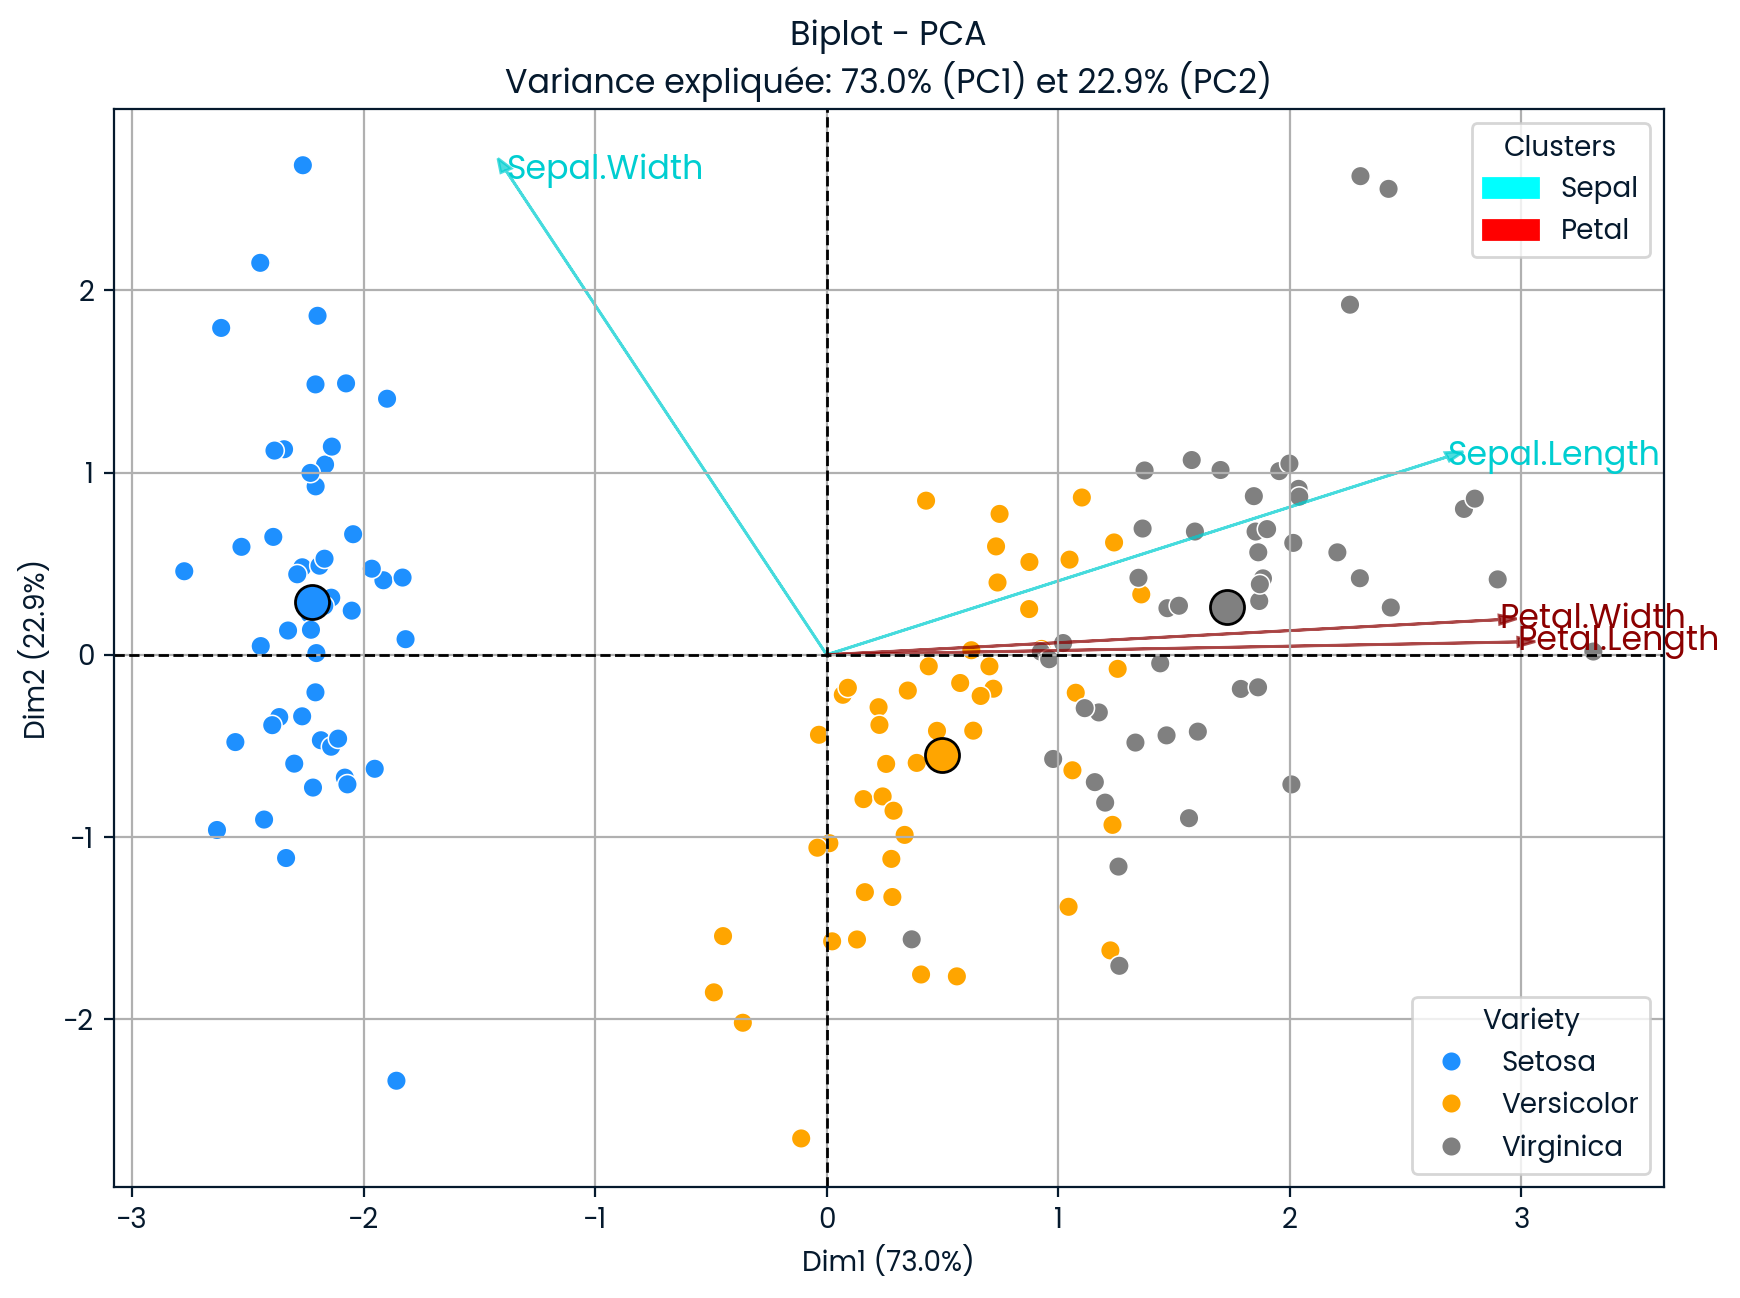

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Chargement des données, le fichier est iris est dans le même repertoire et à racine de celui-ci
df = pd.read_csv('iris.csv')

# Sélection des variables explicatives
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

# Palette des couleurs pour les espèces
palette_couleur = ['DodgerBlue', 'orange', 'gray']

# Standardisation des données
X_scaled = StandardScaler().fit_transform(X)

# Application de l'ACP
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Récupération des composantes principales
explained_variance = pca.explained_variance_ratio_

# Création du DataFrame avec les résultats de l'ACP
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['variety'] = df['variety']

# Facteur d'échelle pour maximiser la visibilité des vecteurs
scale_factor = 3

# Création du biplot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['variety'], palette=palette_couleur, s=50)

# Ajout des flèches pour les vecteurs des variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, name in enumerate(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']):
    ncolor = 'DarkRed'
    if 'Sepal' in name:
        ncolor = 'DarkTurquoise'
        
    plt.arrow(0, 0, loadings[i, 0] * scale_factor, loadings[i, 1] * scale_factor, color=ncolor, alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0] * scale_factor, loadings[i, 1] * scale_factor, name, color=ncolor, fontsize=12, ha='left', va='center')

# Ajout de la légende pour les clusters de variables (Sepal/Petal)
sepal_patch = mpatches.Patch(color='cyan', label='Sepal')
petal_patch = mpatches.Patch(color='red', label='Petal')

# Ajouter la légende variety sans la remplacer
legend1 = plt.legend(handles=[sepal_patch, petal_patch], title="Clusters", loc="upper right")

# Ajouter la légende pour les variétés gérée par seaborn
scatter.legend(title='Variety', loc='lower right')

# Calcul des centroïdes pour chaque variété
centroids = pca_df.groupby('variety').mean()

# Tracé des centroïdes
for (variety, centroid), couleurc in zip(centroids.iterrows(), palette_couleur):
    plt.scatter(centroid['PC1'], centroid['PC2'], c=couleurc, s=150, marker='o', edgecolor='k')

# Ajout des titres et annotations
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title(f'Biplot - PCA\nVariance expliquée: {explained_variance[0]*100:.1f}% (PC1) et {explained_variance[1]*100:.1f}% (PC2)')
plt.xlabel(f'Dim1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Dim2 ({explained_variance[1]*100:.1f}%)')
plt.grid(True)

# Affichage des deux légendes
plt.gca().add_artist(legend1)

plt.show()